In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
diabetes = pd.read_csv("/content/drive/MyDrive/Colab Datasets/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:

feature_cols = ['Pregnancies', 'Insulin', 'BMI',
                'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
X = diabetes[feature_cols]
y = diabetes.Outcome



In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [35]:
coefficents = {"Features": ["Intercept"] + feature_cols,
              "Coefficients":np.concatenate((model.intercept_ ,model.coef_[0]))}
coefficents = pd.DataFrame(coefficents)
coefficents

,Features,Coefficients
0,Intercept,-8.050449
1,Pregnancies,0.089691
2,Insulin,-0.000472
3,BMI,0.094244
4,Age,0.022995
5,Glucose,0.030583
6,BloodPressure,-0.015030
7,DiabetesPedigreeFunction,1.025442


In [ ]:
y_pred = model.predict(X_test)
y_pred[0:5]

Text(0.5, 33.0, 'Predicted Values')

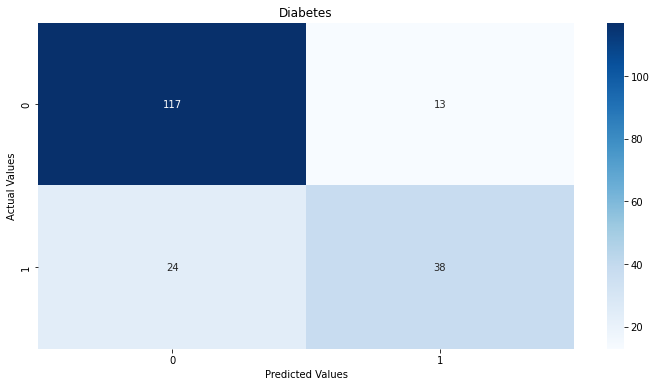

In [51]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,6))
plt.title("Diabetes")
sns.heatmap(conf_mat, annot=True, fmt='', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")